### 정형데이터와 비정형 데이터

  - ML(Machine Learning)은 DL(DeepLearing) 에 비해 비교적 정형 데이터를 분석하기에 적합하며 DL 은 ML에 비해 비정형 데이터에서 성능이 뛰어나다.

  - 비정형 데이터는 텍스트, 오디오, 이미지, 영상 등이 있다.  

  - ML은 정형화된 데이터를 수집하여 전처리과정을 거치고 분석하는 특성공학의 형태를 띈다.

  - DL에서 위의 비정형데이터 들을 가지고 학습하고 분석하는 과정을 표현학습이라고 한다.

## 앙상블 알고리즘


### 랜덤포레스트

  - sklearn 에서 랜덤포레스트 알고리즘을 사용하기 위해서는 RandomForestClassifier 라는 분류 모델 메소드를 사용해야 하며, 같은 알고리즘을 사용한 회귀모델인 RandomForestRegressor 메소드도 존재한다.

### 랜덤 포레스트 훈련방법

  - 부트스랩 샘플 방식을 적용한 훈련세트에서 중복을 허용한 랜덤 샘플링을 활용하여 (원래 데이터의 샘플 갯수를 유지) 각각의 개별 결정트리를 훈련한다.

  - 각각의 트리의 정확도의 확률의 합의 평균 중 가장 높은 확률의 모델을 선택한다.

  - 회귀의 경우 확률값이 아닌 예측값으로 바꾸어 예측값의 평균 값 등을 활용한다.

  - 분류모델일 경우 각 트리의 정보이득(부모노드와 자식노드의 지니 불순도 차이) 가 최대화(정보차이가 최대화되면 전체 모델의 정확도가 올라간다.) 되지 못하도록 특성개수를 제한한다. (예를 들어 전체 특성개수의 sqrt(특성개수) 개로 제한 등)
  이러한 제한된 트리들을 여러개를 만들고 이 트리모델들의 집합(Forest)을 훈련한다. (분류일때는 특성개수를 제한하지만, 회귀일때는 특성개수를 모두 사용한다.)

  - 위의 방법으로 인하여 전체적인 모델의 성능은 저하되지만, 결론적으로 과대적합을 방지할 수 있으며, 낮은 성능의 모델들을 결합하여 결론적으로 높은 성능을 유지할 수 있다.(검증 세트, 데스트 세트의 성능을 높일 수 있다.)

  - 기본적으로 랜덤 포레스트는 100개의 트리를 만든다, 물론 매개변수를 지정하여 100개 이상의 트리를 만들 수 있다.

In [ ]:
import pandas as pd
import numpy as np

wine = pd.read_csv('https://bit.ly/wine-date')

In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
# sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [ ]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [ ]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


  - 샘플을 중복해서 사용하는 부트스트랩 샘플링방식으로 트리를 훈련할때 트리마다 랜덤하게 샘플을 적용하기 때문에 사용되지 않고 남게되는 샘플이 있다. 이러한 샘플들을 OOB 라고 한다.

  - 이러한 OOB 샘플들을 사용해서 마치 검증세트 처럼 사용할 수 있다. 적용하는 방법은 RandomForestclassifier 메소드의 매개변수 중 oob_score를 True로 선택하면되고 검증하는 것이 아니기 때문에 따로 데이터에 저장된다.

  - OOB 샘플의 점수를 보려면 obb_score_ 객체(메소드)를 사용하면 된다.


### 엑스트라 트리

- 엑스트라 트리는 랜덤 포레스트와 많은 부분을 공유하고 있으며, 분류모델인 ExtraTreesClassifier 와 회귀모델인 ExtraTreesRegressor 가 존재한다.

- 랜덤 포레스트와 동일하게 기본적으로 100개의 트리를 사용하며, 분류모델일 경우 특성의 제한으로 개별트리마다 특성개수의 제곱근개수를 사용한다. 회귀모델일 경우 전체 특성을 사용한다.

- 랜덤포레스트 모델과 다르게 부트스트랩 샘플링 방법을 사용하지 않으며, 전체 샘플링 방식을 사용한다. 일반적인 트리 모델 분류방법인 정보이득 최대화 방법을 사용하지 않으며 각각의 특성 마다 랜덤으로 분할 하여 그중에 가장 불순도가 적은 방식으로 분할을 한다.(무작위성을 추가 함으로써 과대적합을 방지)

- 일반적으로 랜덤포레스트 보다 트리를 랜덤하게 분할 하기 때문에 속도가 빠르고, 랜덤하게 분할하기 때문에 랜덤포레스트 보다 트리의 갯수를 늘려야 성능이 좋아지는 것로 알려져 있다.

- 기본적으로 랜덤포레스트와 엑스트라 트리는 매우 유사한 방식이지만 성능을 저하시키는 방법(과대적합을 방지하는 방법)이 서로 다르다(랜덤포레스트 : 트리갯수 제한, 부트스트랩샘플 방식 적용 , 엑스트라 트리 : 전수샘플링, 트리의 노드분할시 무작위 분할방식 적용)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [ ]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


### 그레이디언트 부스팅

- 분류일때는 로지스틱 손실 함수 사용
- 회귀일때는 평균제곱오차를 사용 MSE
- 위의 결과값(실수)이 작아지도록 tree(회귀트리)를 추가하는 방식
- GradientBoostingClassifier , GradientBoostingRegressor 모두 회귀트리(손실함수가 최소화되는 알고리즘)를 사용한다.
- 학습속도가 너무 빠르면 최적점을 건너띄는 문제가 발생하기 때문에 GradientBoostingClassifier 함수의 매개변수 중 learning_rate 라는 파라미터로 학습속도를 조절한다.
- 결정트리 회귀모델을 사용하기 때문에 매개변수인 max_depth 를 3 으로 제한하여 회귀트리를 조정하여 과대적합을 방지할 수 있다.

- 한개의 모델을 만들고 손실함수를 추출하여 회귀트리를 만들어야 되기 때문에(순차구현), 랜덤포레스트 혹은 엑스트라트리 모델(병렬구현) 보다 검증 시간, 모델 적용시간이 느리다.

- n_estimators 매개 변수를 활용하여 트리의 갯수를 더 늘리거나 조정할 수 있다.

- learning_rate 는 기본값 = 0.1 이고 변경할 수 있다.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [ ]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42) ## n_estimator로 트리의 갯수를 500개로 조정, learning_rate 기본값인 0.1에서 0.2로 변경
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [ ]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


In [ ]:
## n_estimate의 갯수를 조절해서 모델의 훈련데이터의 score와 테스트데이터의 score를 시각화 하기
train_scores = []
test_scores = []
estimators = range(5, 500, 50)
for i in range(5, 500, 50):
    gb = GradientBoostingClassifier(n_estimators=i, random_state=42)
    scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
    train_scores.append(np.mean(scores['train_score']))
    test_scores.append(np.mean(scores['test_score']))

In [ ]:
list(map(lambda x: print(f"Train Score: {x[0]}, Test Score: {x[1]}"), zip(train_scores, test_scores)))
# 테스트데이터 중 가장 높은 점수 고르고 해당 모델의 인덱스와 훈련데이터 점수, 테스트 데이터 점수를 표시하기
print(train_scores[test_scores.index(max(test_scores))], max(test_scores),  test_scores.index(max(test_scores)))
print(estimators[test_scores.index(max(test_scores))])

Train Score: 0.7579372773984272, Test Score: 0.7579373658103206
Train Score: 0.8787764120696524, Test Score: 0.869158584437699
Train Score: 0.8888783709808488, Test Score: 0.871658584437699
Train Score: 0.8940254811075115, Test Score: 0.8733902791145333
Train Score: 0.8984511020835294, Test Score: 0.8737752646775746
Train Score: 0.9038869397782076, Test Score: 0.8749285555637819
Train Score: 0.9086012536096731, Test Score: 0.8762763752128526
Train Score: 0.9119205040542544, Test Score: 0.876660805508255
Train Score: 0.9156245548836359, Test Score: 0.8778148367513141
Train Score: 0.9197616565670451, Test Score: 0.876660805508255
0.9156245548836359 0.8778148367513141 8
405


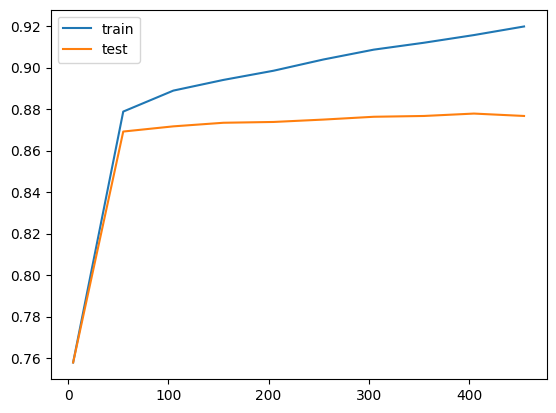

In [ ]:
import matplotlib.pyplot as plt
estimators = range(5, 500,50)
plt.plot(estimators, train_scores, label='train')
plt.plot(estimators, test_scores, label='test')
plt.legend()
plt.show()

### 히스토그램 기반 그레이티언트 부스팅

- 히스토그램이란 데이터를 일정한 구간으로 나누어서 막대그래프를 그린것으로 이러한 방식으로 훈련 데이터를 256개의 구간으로 나누어서 특성을 변화시켜서 학습시키는 방식이다.

- 대규모 데이터에 적합한 방식이며 학습 속도가 빠르고 과대적합도 방지할 수 있으며 높은 성능을 낼수 있는 방식이다.

- sklearn 라이브러리에서 추가된지는 오래된 알고리즘이지만 아직은 실험적인 단계이기 때문에 experimental 모듈 밑에 enable_hist_gradient_boosting 이라는 클래스를 불러오면 ensemble 클래스의 HistGradientBoostingClassifier 모델을 사용할 수 있다.

- HistGradientBoosting 모델은 특성중요도 feature_importance_ 메소드를 사용할 수 없다.


In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


### Permutation Importance (치환 중요도)

- 여러 특성들중 첫번째 특성을 무작위로 섞어서 성능을 측정하고, 두번째 특성을 무작위로 섞에서 성능을 측정한다. 이러한 방법을 반복하여 성능을 측정하고 원래 데이터의 모델의 성능을 측정하여 각각의 측정된 성능과의 차이를 계산한다. 그 중 계산된 값이 가장 작은것이 특성 중요도가 가장 높은 것으로 파악하는 알고리즘

- 그라디이언트 부스팅 혹은 선형회귀, 로지스틱 등 어떤 모델이든지 위의 특성중요도를 측정하는 알고리즘을 적용하는 것이 가능하다.

- n_repeats 매개변수는 기본값이 5이며 각 특성들을 무작위로 섞은 모델과 원래모델과의 성능차이를 구하는 반복횟수를 의미한다.

- result.importances_mean은 각각의 특성마다의 모델들과 원래 모델과의 차이들을 평균한 값을 나타낸다.





In [ ]:
from sklearn.inspection import permutation_importance
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)

print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [ ]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [ ]:
hgb.score(test_input, test_target)

0.8723076923076923

### XGBoost vs LightGBM (GradientBoosting 전용 라이브러리_ MS에서 만듬)

- XGBoost 알고리즘을 사용하여 분류모델을 구현하려면 xgboost 모듈 밑에 XGBClassifier 함수를 사용하면 된다.(회귀 모델은 XGBRegressor를 사용하면 된다.)

- LightGBM 알고리즘을 사용하여 분류모델을 구현하려면 lightgbm 모듈 밑에 LGBMClassifier 함수를 사용하면된다. (회귀모델은 LGBMRegressor 함수를 사용하면 된다.)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9558403027491312 0.8782000074035686


In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884


## 앙상블 보고서

  - 앙상블 학습은 정형 데이터에서 가장 뛰어난 성능을 낸는 머신러닝 알고리즘 중 하나 입니다. 대표적인 앙상블 학습은 다음과 같습니다.

#### 사이킷런

   - 랜덤 포레스트 : 부트스트랩 샘플 사용, 대표 앙상블 학습알고리즘 임.
   - 엑스트라 트리 : 결정트리의 노드를 랜덤하게 분할 함
   - 그레이디언트 부스팅 : 이진트리의 손실을 보완하는 식으로 얖은 결정트리를 연속하여 추가함.
   - 히스토드램 기반 그레이디언트 부스팅 : 훈련 데이터를 256개 정수 구간으로 나누어 빠르고 높은 성능을 냄
   - 에이다 부스트 : 여러 개의 약한 학습기(Decision Stump, 깊이가 1인 트리)를 결합하여 강한 학습기(strong learner)를 만드는 앙상블 학습 방법

#### 그외 라이브러리

   - XGBoost
   - LightGBM



## Ada Boost

- n_estimators는 약한학습기의 개수(트리개수)를 의미하며 n_estimators의 기본값은 50이다. 나머지 모델(RandomForest, GradientBoosting, HistGradientBoosting)은 모두 100이다.

- sklearn.ensemble 모듈 밑에 AdaBoostClassifier 함수를 사용해야 하며, sklearn.tree 모듈 밑의 DecisionTreeClassifier 함수를 사용하여 기본트리들의 max_depth을 결정한다.

####작동 방식

1. 초기 모델 학습:

  - 초기 데이터셋으로 첫 번째 약한 학습기를 학습

2. 오류 계산 및 가중치 업데이트:

  - 각 데이터 포인트에 대해 모델의 예측 오류를 계산

  - 잘못 분류된 데이터 포인트에 더 높은 가중치를 부여

  - 다음 학습기는 이 가중치를 반영하여 학습

3. 반복 학습:

  - 지정된 횟수만큼 반복하여 각 학습기마다 가중치를 조정

4. 최종 모델 결합:

  - 모든 약한 학습기의 예측을 결합하여 최종 예측을 수행


#### 장점

  - 성능 향상: 단일 모델보다 높은 성능을 발휘

  - 유연성: 다양한 약한 학습기와 함께 사용 가능

  - 강건성: 과적합에 덜 민감

####단점

  - 민감성: 노이즈 데이터에 민감

  - 계산 비용: 많은 학습기 학습으로 인한 계산 비용 증가





In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier(max_depth=5, random_state=42)
ab = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
scores = cross_validate(ab, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.994179442916513 0.8720456059820835


In [ ]:
ab = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)
scores = cross_validate(ab, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8706981565114384


In [ ]:
ab.fit(train_input, train_target)
print(ab.feature_importances_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[0.31149039 0.33508749 0.35342211]


In [ ]:
## n_estimate의 갯수를 조절해서 모델의 훈련데이터의 score와 테스트데이터의 score를 시각화 하기
train_scores = []
test_scores = []
estimators = range(5, 500, 50)
for i in range(5, 500, 50):
    ab = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=i, random_state=42)
    scores = cross_validate(ab, train_input, train_target, return_train_score=True, n_jobs=-1)
    train_scores.append(np.mean(scores['train_score']))
    test_scores.append(np.mean(scores['test_score']))

In [ ]:
list(map(lambda x: print(f"Train Score: {x[0]}, Test Score: {x[1]}"), zip(train_scores, test_scores)))
# 테스트데이터 중 가장 높은 점수 고르고 해당 모델의 인덱스와 훈련데이터 점수, 테스트 데이터 점수를 표시하기
print(train_scores[test_scores.index(max(test_scores))], max(test_scores),  test_scores.index(max(test_scores)))
print(estimators[test_scores.index(max(test_scores))])

Train Score: 0.8893592210407221, Test Score: 0.8614601688013623
Train Score: 0.9968250728414307, Test Score: 0.8728152069297401
Train Score: 0.9974503966084433, Test Score: 0.8703140963944621
Train Score: 0.9974503966084433, Test Score: 0.8766641371140891
Train Score: 0.9974503966084433, Test Score: 0.8791654327385802
Train Score: 0.9974503966084433, Test Score: 0.8805123269415859
Train Score: 0.9974503966084433, Test Score: 0.8789727548678463
Train Score: 0.9974503966084433, Test Score: 0.8783958317909232
Train Score: 0.9974503966084433, Test Score: 0.8785881394832309
Train Score: 0.9974503966084433, Test Score: 0.8791654327385799
0.9974503966084433 0.8805123269415859 5
255


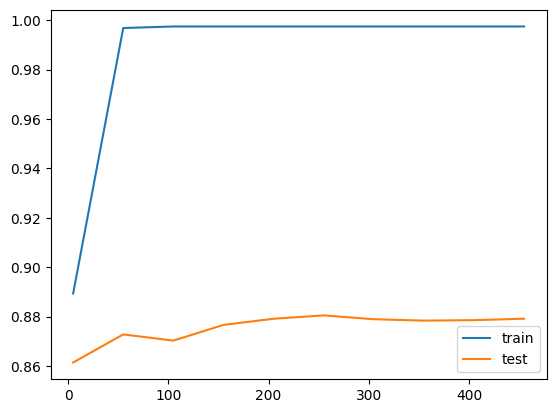

In [ ]:
import matplotlib.pyplot as plt
estimators = range(5, 500,50)
plt.plot(estimators, train_scores, label='train')
plt.plot(estimators, test_scores, label='test')
plt.legend()
plt.show()

### SVM 서포트 벡터 머신

- 분류 모델을 구현 하기위해서는 sklearn.svm 모듈 밑의 SVC 함수를 사용하며, 회귀모델을 구현하기 위해서는 sklearn.svm 모듈 밑의 SVR 함수를 사용한다.

- SVC함수와 SVR함수의 매개변수인 C는 모델의 복잡성을 의미하며 기본값은 1.0이고  숫자가 작을수록 과적합을 완화시킵니다.

- SVR함수의 매개변수인 epsilon 은 회귀 모델의 오차 범위를 설정합니다. 기본값은 0.1이고 숫자를 낮출수록 연산은 느려지고 모델의 성능이 올라갑니다.

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0, gamma='scale')
scores = cross_validate(svm, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8430344893659785 0.8416382246242688


In [ ]:
svm = SVC(kernel='rbf', C=5.0, gamma='scale')
scores = cross_validate(svm, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8564074713942407 0.8554923373065819


In [ ]:
svm.fit(train_input, train_target)
result = permutation_importance(svm, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)

print(result.importances_mean)

[0.05595536 0.18810852 0.0333654 ]


In [ ]:
result = permutation_importance(svm, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)

print(result.importances_mean)

[0.06723077 0.19115385 0.04484615]


In [ ]:
svm.score(test_input, test_target)

0.8584615384615385